In [62]:
import pandas as pd
import seaborn as sns

In [63]:
p_df = sns.load_dataset("penguins")
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [64]:
p_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [65]:
p_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [66]:
# drop null values and duplicates

p_df = p_df.dropna()
p_df = p_df.drop_duplicates()

### X-y split

In [67]:
X = p_df[['flipper_length_mm','bill_depth_mm',]]
y = p_df[['body_mass_g']]

In [68]:
y

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0
...,...
338,4925.0
340,4850.0
341,5750.0
342,5200.0


### Train-test split

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42) # default test_size = 75/25 split

In [71]:
y_test

,body_mass_g
30,3250.0
317,4875.0
79,4000.0
201,3675.0
63,4050.0
...,...
247,5650.0
122,3450.0
146,4250.0
182,3200.0


In [129]:
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_scaled = sscaler.transform(X_train)
X_test_scaled = sscaler.transform(X_test)

### Model training

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [128]:
#standard scaled!
model2 = lm.fit(X_train_scaled,y_train)

In [74]:
model.coef_ 
# coefficient/slope attributes of X_train, 
#i.e. slopes of Beta1 and Beta2, i.e. slopes of bill depth and flipper length

array([[52.20343571, 13.10815533]])

In [133]:
model2.coef_

array([[722.41978207,  25.65521547]])

In [75]:
model.intercept_ # intercept attribute, i.e. Beta0

#body_mass = -6509.21 + 52.2*flipper_length + 13.1*bill_depth

array([-6509.21617362])

### Predict outputs

In [76]:
random_penguin = X_test.sample() # get random row from test set
random_penguin

,flipper_length_mm,bill_depth_mm
260,208.0,13.7


In [77]:
model.predict(random_penguin) # predicted body mass in grams

array([[4528.68018142]])

### Create predictions for test set

In [78]:
y_pred = model.predict(X_test) 
y_pred = pd.DataFrame(y_pred)
y_pred # to be compared against y_test

,0
0,3001.901576
1,5271.325621
2,3920.819556
3,4053.835184
4,3752.411909
...,...
79,4911.144833
80,2901.427151
81,3653.248300
82,3470.421682


In [132]:
y_pred2 = model.predict(X_test_scaled)
y_pred2 = pd.DataFrame(y_pred2)
y_pred2

,0
0,3001.901576
1,5271.325621
2,3920.819556
3,4053.835184
4,3752.411909
...,...
79,4911.144833
80,2901.427151
81,3653.248300
82,3470.421682


In [79]:
y_test = y_test.reset_index(drop=True) # need to make sure we reset the index before concat
y_test

,body_mass_g
0,3250.0
1,4875.0
2,4000.0
3,3675.0
4,4050.0
...,...
79,5650.0
80,3450.0
81,4250.0
82,3200.0


In [83]:
residuals_df = pd.concat([y_test,y_pred],axis=1)
residuals_df = residuals_df.rename(columns={'body_mass_g':'y_test',0:'y_pred'})
residuals_df

,y_test,y_pred
0,3250.0,3001.901576
1,4875.0,5271.325621
2,4000.0,3920.819556
3,3675.0,4053.835184
4,4050.0,3752.411909
...,...,...
79,5650.0,4911.144833
80,3450.0,2901.427151
81,4250.0,3653.248300
82,3200.0,3470.421682


In [84]:
residuals_df['residual'] = residuals_df['y_test']-residuals_df['y_pred']

In [85]:
residuals_df

,y_test,y_pred,residual
0,3250.0,3001.901576,248.098424
1,4875.0,5271.325621,-396.325621
2,4000.0,3920.819556,79.180444
3,3675.0,4053.835184,-378.835184
4,4050.0,3752.411909,297.588091
...,...,...,...
79,5650.0,4911.144833,738.855167
80,3450.0,2901.427151,548.572849
81,4250.0,3653.248300,596.751700
82,3200.0,3470.421682,-270.421682


### Calculating metrics

In [88]:
# mean of residuals would give us Mean Error (ME)
mean_error = residuals_df.residual.mean()
mean_error # very small, because we have error compensation 

0.42567127691797524

In [89]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [90]:
mse(y_test,y_pred) # mean squared error

135012.9173072701

In [91]:
mae(y_test,y_pred) # mean absolute error

295.239293718512

In [92]:
import numpy as np
np.sqrt(mse(y_test,y_pred))  # root mean squared error / RSE
# can also be use mse function and set squared false

367.4410392257105

In [113]:
rmse_test = mse(y_test,y_pred,squared=False)
rmse_test # same as above! : )

367.4410392257105

In [ ]:
# make sure you scale only after train-test-split
# if you scale before splitting, then you have scaled using information that the machine should not have seen yet
# scaler on train set, scale the test set
# 1. scale data on train set (fit and transform) scaler.fit_transform(X_train)
# 2. scale data in test set with same scaler (transform only) scaler.transform(X_test)

### Computing R2_score for test_set

In [97]:
from sklearn.metrics import r2_score

In [111]:
r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.78

### Computing R2_score for train_set

In [106]:
y_train_score = y_train.copy()
y_train_score = y_train_score.reset_index(drop=True)
y_train_score.columns = ['y_train_score']
y_train_score

,y_train_score
0,5600.0
1,4900.0
2,3950.0
3,4875.0
4,4500.0
...,...
244,3550.0
245,3900.0
246,3200.0
247,5000.0


In [103]:
y_pred_train = pd.DataFrame(model.predict(X_train))
y_pred_train.columns = ['y_pred_train']
y_pred_train

,y_pred_train
0,5616.005808
1,5001.132734
2,3671.599717
3,4741.426371
4,4453.340437
...,...
244,3973.022992
245,3350.514210
246,3798.061267
247,5172.162012


In [108]:
metrics_train = pd.concat([y_train_score,y_pred_train],axis=1)
metrics_train

,y_train_score,y_pred_train
0,5600.0,5616.005808
1,4900.0,5001.132734
2,3950.0,3671.599717
3,4875.0,4741.426371
4,4500.0,4453.340437
...,...,...
244,3550.0,3973.022992
245,3900.0,3350.514210
246,3200.0,3798.061267
247,5000.0,5172.162012


In [112]:
rmse_train = mse(y_train_score,y_pred_train,squared=False)
rmse_train

398.9681055552095

In [110]:
r2_train = round(r2_score(y_train_score,y_pred_train),2)
r2_train

# r2_train 0.76 < r2_test 0.78, our test turned out more accurate than our train data

0.76

In [115]:
print(f'rmse_train: {rmse_train}')
print(f'rmse_test: {rmse_test}')

# If error_train very high -> Underfitting
# If error_train <= error_test -> Ok
# If error_train very small and <<<< error_test -> Overfitting
# no specific benchmark of r2 difference or error metric difference to determine under- or overfitting

# in this case, rmse_train > rmse_test, so maybe we've underfitted? 

rmse_train: 398.9681055552095
rmse_test: 367.4410392257105


In [122]:
feature_names = list(X_train.columns)
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]
fi_dict = {'name':feature_names,'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,flipper_length_mm,52.203436
1,bill_depth_mm,13.108155


In [139]:
coefficients2 = model2.coef_
coefficients2 = [i for i in coefficients2[0]]
fi2_dict = fi_dict = {'name':feature_names,'coeff':coefficients2}
fi2_df = pd.DataFrame(fi2_dict)
fi2_df

,name,coeff
0,flipper_length_mm,722.419782
1,bill_depth_mm,25.655215


<Axes: xlabel='name', ylabel='coeff'>

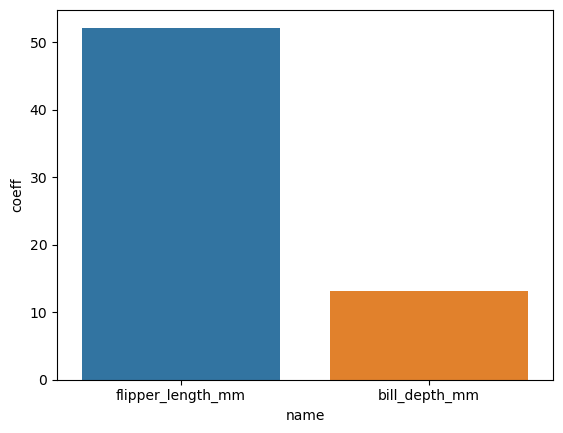

In [125]:
sns.barplot(x=fi_df['name'],y=fi_df['coeff'])

# read my coefficients in which y changes at the rate of coefficients

<Axes: xlabel='name', ylabel='coeff'>

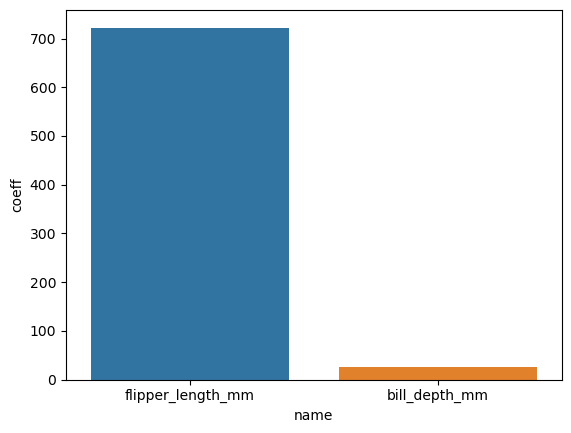

In [140]:
sns.barplot(x=fi2_df['name'],y=fi2_df['coeff'])

# scaled, shows that flipper length is more important of a coefficient than bill depth

In [143]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# for customer marketing df
# encode ordinal columns

enc = OrdinalEncoder(categories=[['Basic','Extended','Premium']])
enc.fit(ordinals[['coverage']])
ordinals['coverage'] = enc.transform(ordinals[['coverage']])